<a href="https://colab.research.google.com/github/m-a-hasan/ai-colab/blob/main/03_convolutional_neural_network_and_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install packages
# Check libcudnn8 version
!apt-cache policy libcudnn8

# Install latest version
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

# Export env variables
!export PATH=/usr/local/cuda-11.4/bin${PATH:+:${PATH}}
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/lib64:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/include:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/extras/CUPTI/lib64

# Install tensorflow
!pip install tflite-model-maker==0.4.0
!pip uninstall -y tensorflow && pip install -q tensorflow==2.9.1
!pip install pycocotools==2.0.4
!pip install opencv-python-headless==4.6.0.66

libcudnn8:
  Installed: 8.0.5.39-1+cuda11.1
  Candidate: 8.5.0.96-1+cuda11.7
  Version table:
     8.5.0.96-1+cuda11.7 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.5.0.96-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.1.50-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.1.50-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.3.3.40-1+cuda11.5 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.3.3.40-1+cuda10.2

Found existing installation: tensorflow 2.9.1
Uninstalling tensorflow-2.9.1:
  Successfully uninstalled tensorflow-2.9.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Classify whether a picture of food contains pizza or steak

**Step 1** - Understand and visualize the data

In [ ]:
# Download pizza and steak images
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-08-20 04:26:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 108.177.112.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   171MB/s    in 0.6s    

2022-08-20 04:26:31 (171 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Unzip downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Check what is in the folders (we can inspect it from left menu as well)
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
# Let's see how many files are in each folder
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# If you want to know how many files are in one folder
len(os.listdir("pizza_steak/train/steak"))

750

In [ ]:
# Get the class names from folders
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Function to visualize a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set the target folder path
  target_folder = target_dir+target_class

  # Get a random image
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


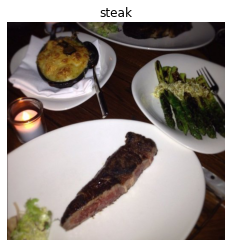

In [ ]:
# Call the function to plot a random image of a steak
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Image shape: (512, 512, 3)


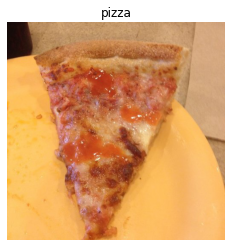

In [ ]:
# Call the function to plot a random image of a pizza
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
# Image shape is (384, 512, 3)
img

array([[[ 22,  12,  11],
        [ 22,  12,  11],
        [ 21,  11,  10],
        ...,
        [208, 160, 122],
        [209, 161, 123],
        [210, 162, 124]],

       [[ 21,  11,  10],
        [ 20,  10,   9],
        [ 20,  10,   9],
        ...,
        [208, 160, 122],
        [208, 160, 122],
        [208, 160, 122]],

       [[ 21,  11,  10],
        [ 20,  10,   9],
        [ 19,   9,   8],
        ...,
        [208, 160, 122],
        [207, 159, 121],
        [206, 158, 120]],

       ...,

       [[253, 188,  88],
        [253, 188,  88],
        [254, 189,  89],
        ...,
        [252, 180,  95],
        [252, 180,  95],
        [252, 180,  95]],

       [[253, 188,  88],
        [253, 188,  88],
        [254, 189,  89],
        ...,
        [251, 179,  94],
        [251, 179,  94],
        [251, 179,  94]],

       [[253, 188,  88],
        [253, 188,  88],
        [254, 189,  89],
        ...,
        [251, 179,  94],
        [251, 179,  94],
        [251, 179,  94]]

Here (384, 512, 3) means (Width, height, Colour Channels)

In [ ]:
# Data normalization
img.min(), img.max()

(0, 255)

In [ ]:
img/255

array([[[0.08627451, 0.04705882, 0.04313725],
        [0.08627451, 0.04705882, 0.04313725],
        [0.08235294, 0.04313725, 0.03921569],
        ...,
        [0.81568627, 0.62745098, 0.47843137],
        [0.81960784, 0.63137255, 0.48235294],
        [0.82352941, 0.63529412, 0.48627451]],

       [[0.08235294, 0.04313725, 0.03921569],
        [0.07843137, 0.03921569, 0.03529412],
        [0.07843137, 0.03921569, 0.03529412],
        ...,
        [0.81568627, 0.62745098, 0.47843137],
        [0.81568627, 0.62745098, 0.47843137],
        [0.81568627, 0.62745098, 0.47843137]],

       [[0.08235294, 0.04313725, 0.03921569],
        [0.07843137, 0.03921569, 0.03529412],
        [0.0745098 , 0.03529412, 0.03137255],
        ...,
        [0.81568627, 0.62745098, 0.47843137],
        [0.81176471, 0.62352941, 0.4745098 ],
        [0.80784314, 0.61960784, 0.47058824]],

       ...,

       [[0.99215686, 0.7372549 , 0.34509804],
        [0.99215686, 0.7372549 , 0.34509804],
        [0.99607843, 0

In [ ]:
# Create first CNN
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.9.1


In [ ]:
# Set seed
tf.random.set_seed(42)

# Normalize all the data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Setup train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data (and turn it into a batch)
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # convert images to size 224 x 224
                                               class_mode = "binary", # type of problem
                                               seed=42)

# Do the same for the validation data
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of training data
#images, labels = train_data.next()
#images, labels

Labels -> 0 = pizza; 1 = steak

System can autometically label pizza and steak because we mentioned <class_mode='binary'>

In [ ]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 34s 584ms/step - loss: 0.6561 - accuracy: 0.5853 - val_loss: 0.5314 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 14s 303ms/step - loss: 0.4665 - accuracy: 0.7987 - val_loss: 0.3868 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4102 - accuracy: 0.8167 - val_loss: 0.3296 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3846 - accuracy: 0.8373 - val_loss: 0.3303 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 11s 243ms/step - loss: 0.3750 - accuracy: 0.8387 - val_loss: 0.3166 - val_accuracy: 0.8720


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
# Let's see how our traditional model do against image problems
# Set seed
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='binary_crossentropy',
                metrics=["accuracy"])

# Fit
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 235ms/step - loss: 0.6950 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 268ms/step - loss: 0.6932 - accuracy: 0.4827 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Increase the neurons and add one extra layer to our model
# Set seed
tf.random.set_seed(42)

# Create
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="binary_crossentropy",
                metrics=["accuracy"])

# Fit
model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 2.1440 - accuracy: 0.6520 - val_loss: 0.5316 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 11s 237ms/step - loss: 1.3989 - accuracy: 0.6633 - val_loss: 0.4973 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 12s 264ms/step - loss: 0.6057 - accuracy: 0.7567 - val_loss: 0.7903 - val_accuracy: 0.6700
Epoch 4/5
47/47 [==============================] - 19s 399ms/step - loss: 0.5613 - accuracy: 0.7527 - val_loss: 0.4756 - val_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 12s 241ms/step - loss: 0.5636 - accuracy: 0.7587 - val_loss: 0.5337 - val_accuracy: 0.7500


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1

Feature - any significant part of an image (e.g. circular shape of a pizza)

**Explanation of Conv2D**
* 2D - inputs are 2D (height & width)
* filters - number of features (usual value 10, 32, 64, 128 - higher value means more complex model)
* kernel_size - size of the filters (3 x 3 means our model will look at a space of 3 x 3 pixels at a time. Usual value 3, 5, 7 - lower value learns smaller features, higher value learns larger features)
* strides - number of pixels filter will move across as it covers the image. 1 stride means a filter moves across an image 1 pixel at a time (1 is default, 2 is used as well)
* padding - 'same' or 'valid'
 * same - adds 0s outside the image
 * valid - cuts off excess pixels where filter doesn't fit (e.g. 224 pixels wide divided by kerner size 3 [224/3 = 74.6] means a single pixel will get cut off at the end)


Great resources
* CNN Explainer Webpage (https://poloclub.github.io/cnn-explainer/)
* A guide to convolutional arithmetic (https://arxiv.org/pdf/1603.07285.pdf)
* Padding (https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t/39371113#39371113)

**Explanation of fitting model**
* steps_per_epoch - number of batches a model will go through per epoch. We wanted our model to go through all batches per epoch so it's equal to len(train_data)
* validation_steps - same as above

In [ ]:
# Create train and test datagen
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Create train and test data set
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Create a new model as our base case
# Set seed
tf.random.set_seed = 42

model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2), # reduce number of features by half
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compile
model_5.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="binary_crossentropy",
                metrics=["accuracy"])

In [ ]:
# Fit
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 299ms/step - loss: 0.6396 - accuracy: 0.6267 - val_loss: 0.5400 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 13s 281ms/step - loss: 0.5042 - accuracy: 0.7660 - val_loss: 0.4363 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4456 - accuracy: 0.8053 - val_loss: 0.4156 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 13s 285ms/step - loss: 0.4311 - accuracy: 0.8100 - val_loss: 0.3790 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 15s 328ms/step - loss: 0.4010 - accuracy: 0.8220 - val_loss: 0.3440 - val_accuracy: 0.8660


In [ ]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

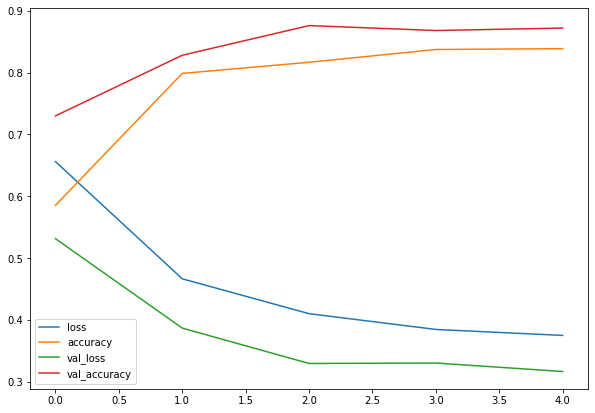

In [ ]:
# Evaluate the model
from pandas import DataFrame as df
df(history_1.history).plot(figsize=(10, 7))

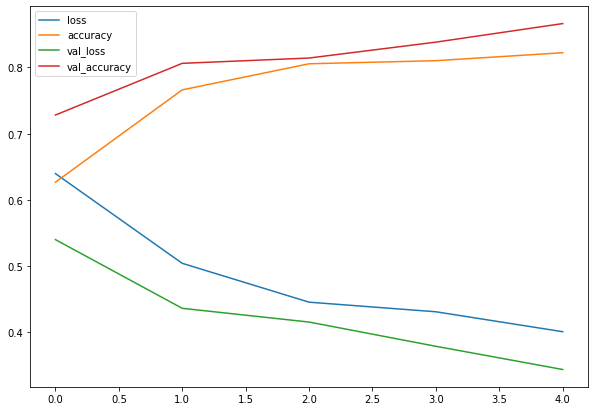

In [ ]:
df(history_5.history).plot(figsize=(10, 7))

**Data augmentation** - process of altering training data, with more diversity, model learns more generalized patterns

In [ ]:
# Augment data
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate image slightly between 0 and 20 degrees
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift image width way
                                             height_shift_range=0.2, # shift image height way
                                             horizontal_flip=True) # flip image on horizontal axis

# Another set of training data without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create test data
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print("Augmented training images")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # usally it is good to shuffle

print("Non-augmented training images")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

print("Unchanged test images")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training images
Found 1500 images belonging to 2 classes.
Non-augmented training images
Found 1500 images belonging to 2 classes.
Unchanged test images
Found 500 images belonging to 2 classes.


In [ ]:
# Let's visualize augmented images
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels are the same, just the image is augmented

(-0.5, 223.5, 223.5, -0.5)

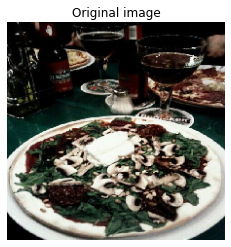

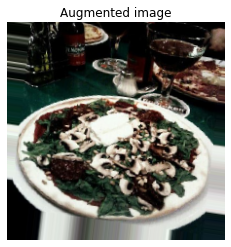

In [ ]:
# Show original and augmented images
random_number = random.randint(0, 32) # from the batch of 32 images
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [ ]:
# To make our life easier, let's import some keras classes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Let's create same model as model 5 and see if there's any improvement
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile
model_6.compile(optimizer=Adam(),
                loss="binary_crossentropy",
                metrics=["accuracy"])

In [ ]:
# Fit
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 32s 658ms/step - loss: 0.7502 - accuracy: 0.4313 - val_loss: 0.6885 - val_accuracy: 0.5120
Epoch 2/5
47/47 [==============================] - 29s 628ms/step - loss: 0.6965 - accuracy: 0.4547 - val_loss: 0.6902 - val_accuracy: 0.6120
Epoch 3/5
47/47 [==============================] - 25s 532ms/step - loss: 0.6900 - accuracy: 0.5453 - val_loss: 0.6805 - val_accuracy: 0.6540
Epoch 4/5
47/47 [==============================] - 24s 514ms/step - loss: 0.6909 - accuracy: 0.6367 - val_loss: 0.6557 - val_accuracy: 0.5260
Epoch 5/5
47/47 [==============================] - 23s 493ms/step - loss: 0.6736 - accuracy: 0.6227 - val_loss: 0.6203 - val_accuracy: 0.7260


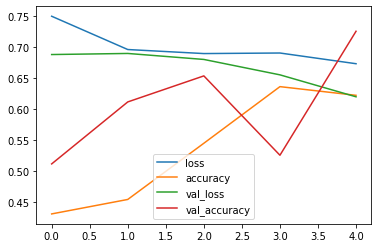

In [ ]:
df(history_6.history).plot()

Not too good. Let's try it by shuffling the images.

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7=Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(optimizer=Adam(),
                loss="binary_crossentropy",
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 637ms/step - loss: 0.6478 - accuracy: 0.6060 - val_loss: 0.4976 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 27s 560ms/step - loss: 0.5294 - accuracy: 0.7440 - val_loss: 0.3787 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 34s 730ms/step - loss: 0.4837 - accuracy: 0.7760 - val_loss: 0.3554 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 28s 597ms/step - loss: 0.4681 - accuracy: 0.7793 - val_loss: 0.3875 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 31s 654ms/step - loss: 0.4646 - accuracy: 0.7873 - val_loss: 0.3335 - val_accuracy: 0.8540


Because the data was shuffled, model was able to see both pizza and steak images in a batch and learned both instead of one at a time

In [ ]:
model_7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 10)      

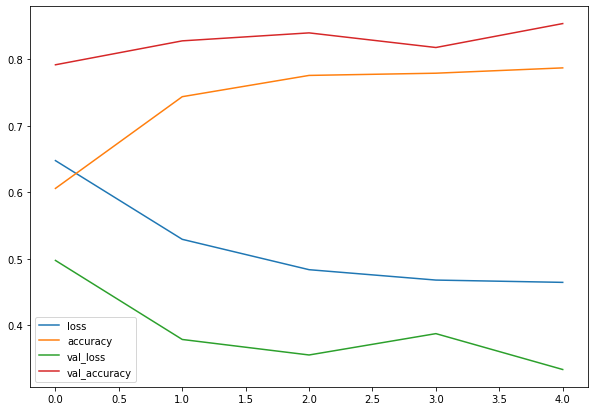

In [ ]:
df(history_7.history).plot(figsize=(10, 7))

Hyperparameters to help tuning our model
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

In [ ]:
# Let's see with our input how model_1 does
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_8.compile(optimizer=Adam(),
                loss="binary_crossentropy",
                metrics=["accuracy"])

history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 634ms/step - loss: 0.6583 - accuracy: 0.5767 - val_loss: 0.6603 - val_accuracy: 0.6140
Epoch 2/5
47/47 [==============================] - 23s 496ms/step - loss: 0.6013 - accuracy: 0.6980 - val_loss: 0.4745 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5338 - accuracy: 0.7347 - val_loss: 0.4225 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 25s 528ms/step - loss: 0.5269 - accuracy: 0.7487 - val_loss: 0.3881 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 23s 496ms/step - loss: 0.5042 - accuracy: 0.7700 - val_loss: 0.4185 - val_accuracy: 0.8140


Didn't improve much. Let's look at the graph

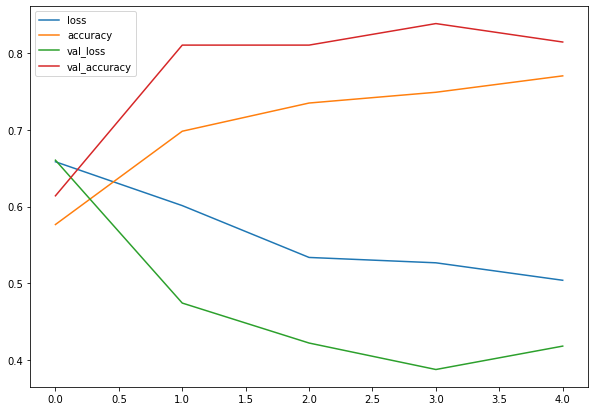

In [ ]:
df(history_8.history).plot(figsize=(10, 7))

It might've done better with more epochs as the loss curve was still trending downwards

In [ ]:
# Time to predict
print(class_names)

['pizza' 'steak']


--2022-08-20 04:38:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-08-20 04:38:15 (34.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

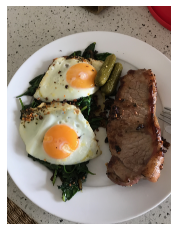

In [ ]:
# Import a steak image and view it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check shape of the image
steak.shape

(4032, 3024, 3)

The image to predict has to be the same shape as the shape the model has trained on

In [ ]:
# Let's reshape the image and turn it into tensor with a function
def load_and_prep_image(filename, img_shape=224):
  """
  1. Reads an image from a filename and turns it into a tensor
  2. Reshapes the image to (image_shape, image_shape, color_channel)
  """
  # Read in target file
  img = tf.io.read_file(filename)

  # Decode the image into a tensor and ensure it has 3 color channels as sometimes images can have 4 color channels
  img = tf.image.decode_image(img, channels=3)

  # Resize image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Let's check our steak image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

If we predict now using model_8.predict(steak), it will fail with <expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)>

This is because when we trained the model we trained with a batch size of 32. This batch size becomes the first dimension (batch_size, 224, 224, 3).

We need to fix this by adding an extra dimension to our image.



In [ ]:
# Add an extra dimension
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
print(f"Shape after adding new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after adding new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 202ms/step


array([[0.92517406]], dtype=float32)

It gives the probability of .77.

Because it is a binary classification, if the probability is >.5, it is under one class. If it is <.5, chances are, it under another class

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Let's round the prediction probability (if it is closer to 1, then steak, if closer to 0, then pizza)
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
# Create a function to predict class name and plot the image
def pred_and_plot(model, filename, class_names):
  """
  Imports image located at a filename, makes a prediction using the trained model and plots the image with the predicted class as title.
  """
  # Import image and preprocess it
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 17ms/step


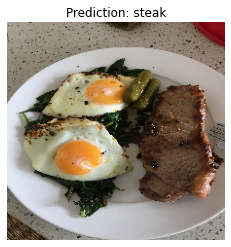

In [ ]:
# Test our model
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2022-08-20 04:38:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-08-20 04:38:17 (41.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 16ms/step


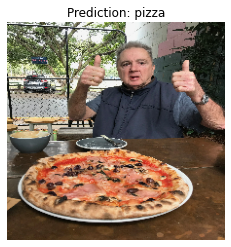

In [ ]:
# Another image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

Instead of binary classification let's use CNN for multiclass classification

In [ ]:
# Import all 10 food classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")

# Extract
zip_ref.extractall()
zip_ref.close()

--2022-08-20 04:38:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 64.233.182.128, 64.233.183.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   260MB/s    in 1.9s    

2022-08-20 04:38:20 (260 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# List all
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get all classnames
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


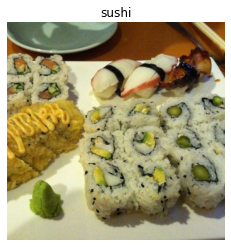

In [ ]:
# View random image
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get random class name

In [ ]:
# Preprocess data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
images, labels = train_data.next()
images, labels, labels.shape

(array([[[[0.02352941, 0.00784314, 0.        ],
          [0.02745098, 0.01176471, 0.        ],
          [0.03137255, 0.01568628, 0.00392157],
          ...,
          [0.19215688, 0.18039216, 0.15294118],
          [0.18823531, 0.1764706 , 0.14901961],
          [0.18039216, 0.16862746, 0.14117648]],
 
         [[0.03137255, 0.01568628, 0.00392157],
          [0.03137255, 0.01568628, 0.00392157],
          [0.02745098, 0.01176471, 0.        ],
          ...,
          [0.18431373, 0.17254902, 0.14509805],
          [0.18823531, 0.1764706 , 0.14901961],
          [0.18431373, 0.17254902, 0.14509805]],
 
         [[0.03529412, 0.01960784, 0.00784314],
          [0.03137255, 0.01568628, 0.00392157],
          [0.02745098, 0.01176471, 0.        ],
          ...,
          [0.18431373, 0.16470589, 0.14117648],
          [0.19215688, 0.17254902, 0.14901961],
          [0.18823531, 0.16862746, 0.14509805]],
 
         ...,
 
         [[0.04313726, 0.02352941, 0.01176471],
          [0.03921

Shishkas! It determines which category it is based on one-hot-encoding.

In [ ]:
# Create model same as model 1
# Set seed

# Create
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile
model_9.compile(optimizer=Adam(),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

# Fit
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 198ms/step - loss: 2.1615 - accuracy: 0.2119 - val_loss: 1.9871 - val_accuracy: 0.2828
Epoch 2/5
235/235 [==============================] - 45s 192ms/step - loss: 1.8470 - accuracy: 0.3664 - val_loss: 1.8237 - val_accuracy: 0.3592
Epoch 3/5
235/235 [==============================] - 46s 195ms/step - loss: 1.4296 - accuracy: 0.5239 - val_loss: 1.9907 - val_accuracy: 0.3216
Epoch 4/5
235/235 [==============================] - 46s 194ms/step - loss: 0.8328 - accuracy: 0.7333 - val_loss: 2.4332 - val_accuracy: 0.3004
Epoch 5/5
235/235 [==============================] - 46s 197ms/step - loss: 0.3526 - accuracy: 0.8913 - val_loss: 3.4311 - val_accuracy: 0.2816


Looks like very high accuracy with train data but very low with test data. Typical sign of overfitting.

In [ ]:
# Evaluate
model_9.evaluate(test_data)

79/79 [==============================] - 11s 145ms/step - loss: 3.4311 - accuracy: 0.2816


[3.4310741424560547, 0.2815999984741211]

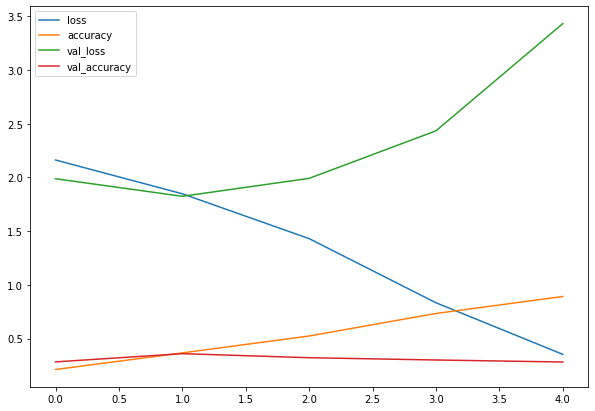

In [ ]:
# Loss curve
df(history_9.history).plot(figsize=(10, 7))

Few ideas for optimization
* Get more data
* Simplify model (to avoid overfitting) - by reducing number of layers
* Use data augmentation - if it learns on weird data, it might be able to generalize more
* Use transfer learning - Use a model that is already pretrained on many food items and tweak it for our use case.

**Preventing overfitting is called regularization**

In [ ]:
# Try with reduced layers
model_10 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_10.compile(optimizer=Adam(),
                 loss="categorical_crossentropy",
                 metrics=["accuracy"])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 183ms/step - loss: 2.1120 - accuracy: 0.2425 - val_loss: 1.9503 - val_accuracy: 0.3216
Epoch 2/5
235/235 [==============================] - 43s 184ms/step - loss: 1.7755 - accuracy: 0.4003 - val_loss: 1.9427 - val_accuracy: 0.3308
Epoch 3/5
235/235 [==============================] - 44s 185ms/step - loss: 1.3504 - accuracy: 0.5635 - val_loss: 2.0432 - val_accuracy: 0.3204
Epoch 4/5
235/235 [==============================] - 43s 181ms/step - loss: 0.7861 - accuracy: 0.7681 - val_loss: 2.3247 - val_accuracy: 0.3084
Epoch 5/5
235/235 [==============================] - 43s 185ms/step - loss: 0.3628 - accuracy: 0.8983 - val_loss: 2.8917 - val_accuracy: 0.2880


Accuracy in train data is 88% and on test data is 27%. Looks like the overfitting issue persists.

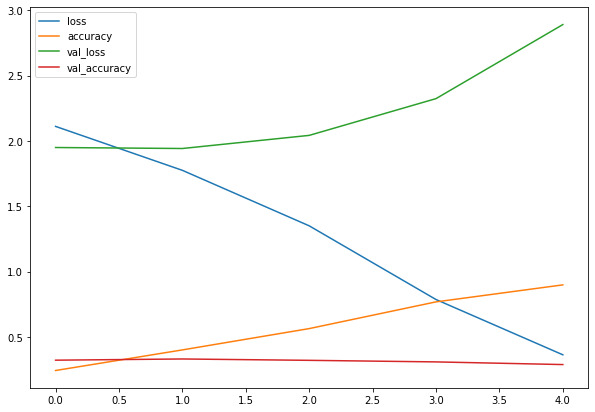

In [ ]:
df(history_10.history).plot(figsize=(10, 7))

In [ ]:
# Let's try data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # value is int, not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


Let's see how the model 10 does on augmented data.

Instead of re-writing model_10, we will clone it. It will not contain any weight from the previous model_10. Just the structure will be the same.

In [ ]:
# Clone model_10
model_11 = tf.keras.models.clone_model(model_10)

# Compile model_11
model_11.compile(optimizer=Adam(),
                 loss="categorical_crossentropy",
                 metrics=["accuracy"])

# Fit on augmented data
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 110s 468ms/step - loss: 2.3648 - accuracy: 0.1432 - val_loss: 2.2285 - val_accuracy: 0.1740
Epoch 2/5
235/235 [==============================] - 109s 465ms/step - loss: 2.2007 - accuracy: 0.1916 - val_loss: 2.0947 - val_accuracy: 0.2348
Epoch 3/5
235/235 [==============================] - 111s 471ms/step - loss: 2.1194 - accuracy: 0.2325 - val_loss: 2.0636 - val_accuracy: 0.2560
Epoch 4/5
235/235 [==============================] - 109s 465ms/step - loss: 2.0898 - accuracy: 0.2536 - val_loss: 1.9725 - val_accuracy: 0.3008
Epoch 5/5
235/235 [==============================] - 109s 463ms/step - loss: 2.0549 - accuracy: 0.2731 - val_loss: 1.9306 - val_accuracy: 0.3004


Last step took so long because it is augmenting a lot of data and then training on that batch.

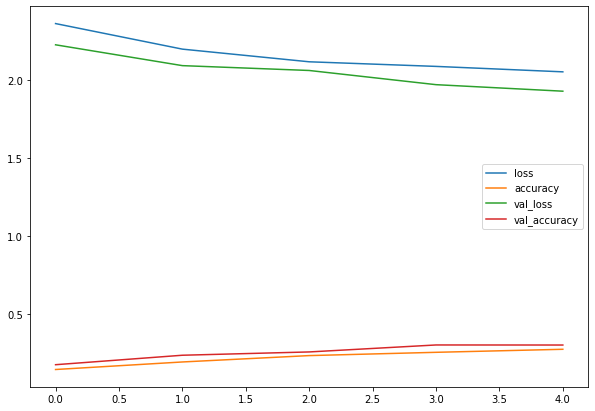

In [ ]:
# Looks much better now (well at least now accuracy for both training data and test data is equally shit)
df(history_11.history).plot(figsize=(10, 7))

In [ ]:
# Let's get some custom images to predict
# -q is for quiet, don't output so much
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
# Let's first re-write pred_and_plot function to accomodate multiclass classification problems
def pred_and_plot(model, filename, class_names):
  """
  Imports image located at a filename, makes a prediction using the trained model and plots the image with the predicted class as title.
  """
  # Import image and preprocess it
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get predicted class
  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


1/1 [==============================] - 0s 74ms/step


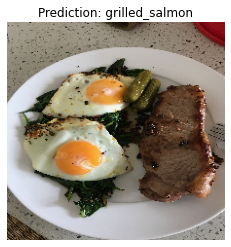

In [ ]:
# Let's predict
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 19ms/step


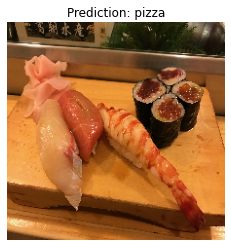

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 16ms/step


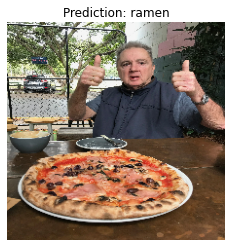

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 17ms/step


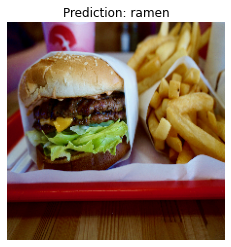

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

Meh!

In [ ]:
# Save the model
model_11.save("saved_trained_model")

In [ ]:
# Load and evaluate
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 1.9306 - accuracy: 0.3004


[1.9305692911148071, 0.3003999888896942]

In [ ]:
# Compare loaded model with model_11 (to make sure they are the same)
model_11.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 1.9306 - accuracy: 0.3004


[1.9305689334869385, 0.3003999888896942]